# Black Friday EDA And Feature Engineering 

## Problem Statement:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [156]:
#importing the dataset
df_train=pd.read_csv("D:\Development\EDA\Practice\Raw\Black_Friday_train.csv.csv")
df_train.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vernon\AppData\Local\Temp\ipykernel_22872\2293632127.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_train=pd.read_csv("D:\Development\EDA\Practice\Raw\Black_Friday_train.csv.csv")


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [157]:
df_test=pd.read_csv("D:\Development\EDA\Practice\Raw\Black_Friday_test.csv.csv")
df_test.head()
#here we will not able to find the purchase column in the test dataset because it is the target variable we have to predict it.

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vernon\AppData\Local\Temp\ipykernel_22872\764755372.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_test=pd.read_csv("D:\Development\EDA\Practice\Raw\Black_Friday_test.csv.csv")


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [158]:


# Merge train and test datasets
df = pd.concat([df_train, df_test], ignore_index=True)

# Display the first few rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [160]:
#user id is waste because it is unique for every user so we will drop it
df.drop(columns=['User_ID'],inplace=True,axis=1) #axis=1 means column wise operation

In [161]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 65.8+ MB


In [162]:
#Handling Categorial Data 
df['Gender']=df['Gender'].map({"F":0,"M":1})
df.head() #Gender column is converted into numerical form 0 and 1

#Handling Categorial Data -Age
df['Age'].unique()
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df['Age'].head()
df.head()

#Handling Categorial Data -City_Category
df['City_Category'].unique()
df['City_Category']=df['City_Category'].map({'A':1,'B':2,'C':3})
df.head()

#Handling Categorial Data -Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','') #removing + sign from the column
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int) #converting the column into integer type

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


In [164]:
#Handling missing values
df.isnull().sum()
df.isnull().sum()*100/len(df) #percentage of missing values in each column

# product category 1 and 2 needs to be fixed and purchase since it is a test data so it should be there

Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
dtype: float64

In [165]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [166]:
df['Product_Category_2'].value_counts() #most occuring value is 8.0 so we will replace the missing values with 8.0

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [167]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0]) #filling the missing values with most occuring value
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,NaN,7969.0


In [168]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


# Visulaization

<Axes: xlabel='Age', ylabel='Purchase'>

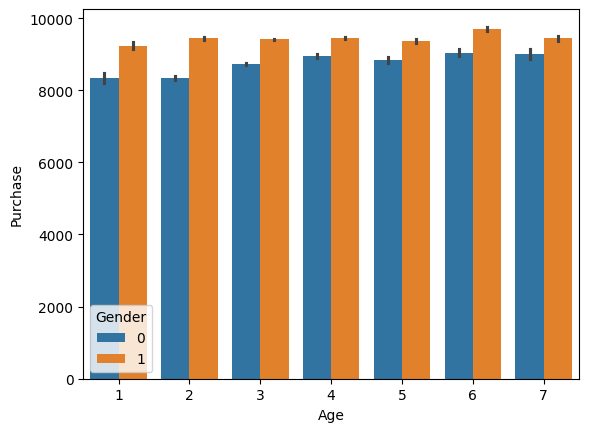

In [169]:
sns.barplot(x=df['Age'],y=df['Purchase'],hue=df['Gender'])

In [170]:
#Insights:
# Male are the highest purchasers
# All the age groups has almost same purchase

<Axes: xlabel='Occupation', ylabel='Purchase'>

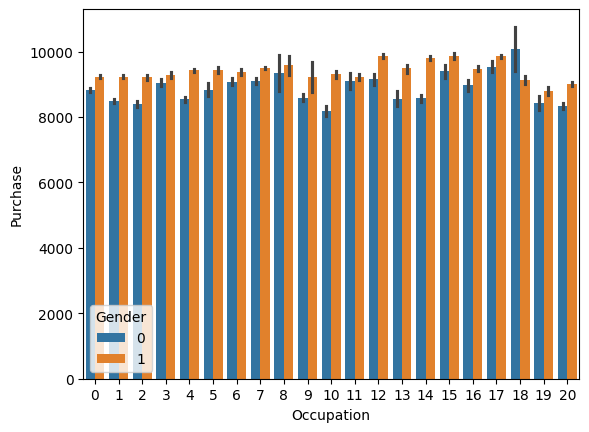

In [171]:
#purchase vs occupation
sns.barplot(x=df['Occupation'],y=df['Purchase'],hue=df['Gender'])

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

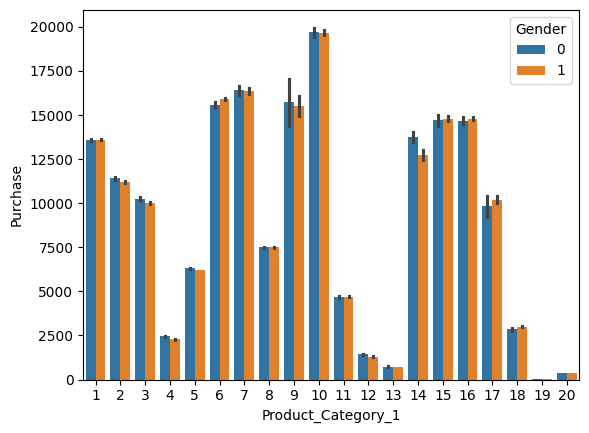

In [172]:
sns.barplot(x=df['Product_Category_1'],y=df['Purchase'],hue=df['Gender'])
#Insights:
#1. Females have a higher average purchase amount than males in all product categories.
#2. The highest average purchase amount is observed in Product_Category_1, followed by Product_Category_3 and Product_Category_2.

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

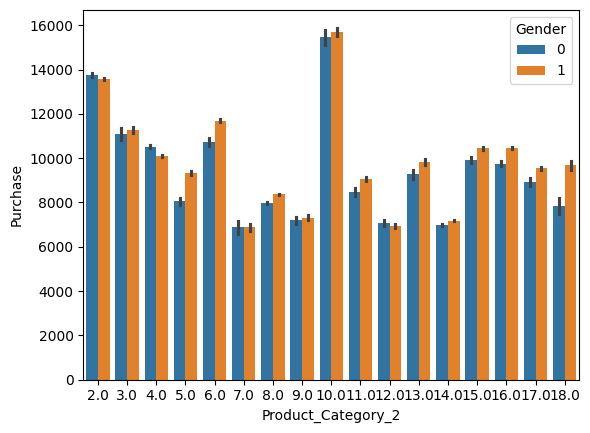

In [173]:
sns.barplot(x=df['Product_Category_2'],y=df['Purchase'],hue=df['Gender'])

In [174]:
#Insights:
# Product category 1 has highest purchase amount ``

In [175]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,NaN,7969.0


In [189]:
df.to_csv("D:\Development\EDA\Practice\cleaned\Black_Fridge_Cleaned.csv",index=False)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vernon\AppData\Local\Temp\ipykernel_22872\2235533942.py:1: SyntaxWarning: invalid escape sequence '\D'
  df.to_csv("D:\Development\EDA\Practice\cleaned\Black_Fridge_Cleaned.csv",index=False)


# Feature Scaling 

In [ ]:
df_test=df[df['Purchase'].isnull()] #checking the test data  empty bcuz we want to predict it 
df_train=df[~df['Purchase'].isnull()] #checking the train data ~empty =not empty

In [ ]:
from sklearn.model_selection import train_test_split

X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
#feature scaling is basically transforming the data into a specific range
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


###Train the Model 
